<a href="https://colab.research.google.com/github/Srijay11/NER_Covid19/blob/main/namedEntityRecognition_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NAMED ENTITY RECOGNITION FOR COVID 19 ARTICLES**

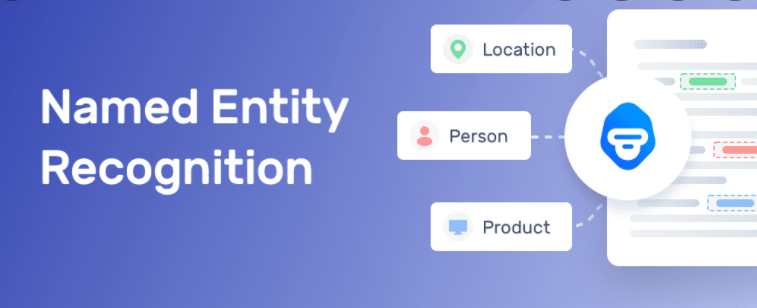

A named entity is a “real-world object” that’s assigned a name – for example, a person, a country, a product or a book title.

Named-entity recognition is a subtask of information extraction that seeks to locate and classify named entities mentioned in unstructured text into pre-defined categories such as person names, organizations, locations, medical codes, time expressions, quantities, monetary values, percentages, etc.

installing and importing necessary packages

In [ ]:
!pip install gensim
!pip install pyLDAvis
!pip install vega
!pip install altair

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import re
import string
import sklearn
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from bs4 import BeautifulSoup
import requests
import re
from collections import Counter
%matplotlib notebook
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models 
pyLDAvis.enable_notebook()
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:126: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):


mounting drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


loading dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine learning/kgarrett-covid-19-open-research-dataset/all_sources_metadata_2020-03-13.csv')

## **PREPROCESSING AND EDA**




In [ ]:
df.shape    

(29500, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29500 entries, 0 to 29499
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sha                          17420 non-null  object 
 1   source_x                     29500 non-null  object 
 2   title                        29491 non-null  object 
 3   doi                          26357 non-null  object 
 4   pmcid                        27337 non-null  object 
 5   pubmed_id                    16730 non-null  float64
 6   license                      17692 non-null  object 
 7   abstract                     26909 non-null  object 
 8   publish_time                 18604 non-null  object 
 9   authors                      28903 non-null  object 
 10  journal                      17791 non-null  object 
 11  Microsoft Academic Paper ID  1134 non-null   float64
 12  WHO #Covidence               1236 non-null   object 
 13  has_full_text   

In [ ]:
df.dtypes

sha                             object
source_x                        object
title                           object
doi                             object
pmcid                           object
pubmed_id                      float64
license                         object
abstract                        object
publish_time                    object
authors                         object
journal                         object
Microsoft Academic Paper ID    float64
WHO #Covidence                  object
has_full_text                   object
dtype: object

In [ ]:
df.describe()

pubmed_id  Microsoft Academic Paper ID
count  1.673000e+04                 1.134000e+03
mean   2.626759e+07                 2.697968e+09
std    4.697935e+06                 4.873586e+08
min    6.717300e+04                 3.912630e+07
25%    2.363481e+07                 2.366820e+09
50%    2.704658e+07                 3.002534e+09
75%    2.995128e+07                 3.005536e+09
max    1.347697e+08                 3.006672e+09

In [ ]:
df.count()

sha                            17420
source_x                       29500
title                          29491
doi                            26357
pmcid                          27337
pubmed_id                      16730
license                        17692
abstract                       26909
publish_time                   18604
authors                        28903
journal                        17791
Microsoft Academic Paper ID     1134
WHO #Covidence                  1236
has_full_text                  17420
dtype: int64

In [ ]:
df.isna().sum()

sha                            12080
source_x                           0
title                              9
doi                             3143
pmcid                           2163
pubmed_id                      12770
license                        11808
abstract                        2591
publish_time                   10896
authors                          597
journal                        11709
Microsoft Academic Paper ID    28366
WHO #Covidence                 28264
has_full_text                  12080
dtype: int64

In [ ]:
df.isna().sum().sum()

136476

removing unnecessary columns

In [ ]:
df.drop(['Microsoft Academic Paper ID','WHO #Covidence','pmcid'],axis=1,inplace=True)

In [ ]:
df.dropna(inplace=True)
df.reset_index(inplace=True)

In [ ]:
df.isna().sum()

index            0
sha              0
source_x         0
title            0
doi              0
pubmed_id        0
license          0
abstract         0
publish_time     0
authors          0
journal          0
has_full_text    0
dtype: int64

installing langdetect module to detect languages

In [ ]:
pip install langdetect

     |████████████████████████████████| 981 kB 18.7 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=b1478cff134f94ee6ea1dff5db72297d02f157315ca79070ddc4dd0a0ec8c494
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


script to detect language of the articles 

In [ ]:
from tqdm import tqdm
from langdetect import detect
from langdetect import DetectorFactory

# set seed
DetectorFactory.seed = 0

# hold label - language
languages = []

# go through each text
for ii in tqdm(range(0,len(df))):
    # split by space into list, take the first x intex, join with space
    text = df.iloc[ii]['abstract'].split(" ")
    
    lang = "en"
    try:
        if len(text) > 50:
            lang = detect(" ".join(text[:50]))
        elif len(text) > 0:
            lang = detect(" ".join(text[:len(text)]))
    # ught... beginning of the document was not in a good format
    except Exception as e:
        all_words = set(text)
        try:
            lang = detect(" ".join(all_words))
        # what!! :( let's see if we can find any text in abstract...
        except Exception as e:
            
            try:
                # let's try to label it through the abstract then
                lang = detect(df.iloc[ii]['abstract_summary'])
            except Exception as e:
                lang = "unknown"
                pass
    
    # get the language    
    languages.append(lang)


100%|██████████| 15165/15165 [01:53<00:00, 134.10it/s]


In [ ]:
from pprint import pprint

languages_dict = {}
for lang in set(languages):
    languages_dict[lang] = languages.count(lang)
    
print("Total: {}\n".format(len(languages)))
pprint(languages_dict)

Total: 15165

{'en': 15164, 'unknown': 1}


plot of the various languages

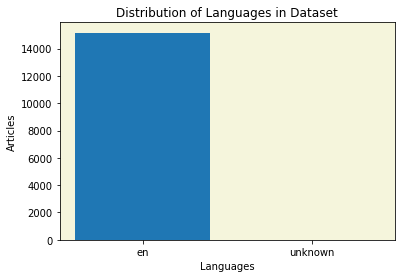

In [ ]:
df['language'] = languages
plt.axes().set_facecolor('#F5F5DC')
plt.bar(range(len(languages_dict)), list(languages_dict.values()), align='center')
plt.xticks(range(len(languages_dict)), list(languages_dict.keys()))
plt.title("Distribution of Languages in Dataset")
plt.ylabel('Articles')
plt.xlabel('Languages')
plt.show()

In [ ]:
df = df[df['language'] == 'en'] 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15164 entries, 0 to 15164
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          15164 non-null  int64  
 1   sha            15164 non-null  object 
 2   source_x       15164 non-null  object 
 3   title          15164 non-null  object 
 4   doi            15164 non-null  object 
 5   pubmed_id      15164 non-null  float64
 6   license        15164 non-null  object 
 7   abstract       15164 non-null  object 
 8   publish_time   15164 non-null  object 
 9   authors        15164 non-null  object 
 10  journal        15164 non-null  object 
 11  has_full_text  15164 non-null  object 
 12  language       15164 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.6+ MB


In [ ]:
df.count()  

index            15164
sha              15164
source_x         15164
title            15164
doi              15164
pubmed_id        15164
license          15164
abstract         15164
publish_time     15164
authors          15164
journal          15164
has_full_text    15164
language         15164
dtype: int64

In [ ]:
df.head()

index                                       sha  ... has_full_text language
0      3  e3b40cc8e0e137c416b4a2273a4dca94ae8178cc  ...          True       en
1     12  4bbb0c59babc718f67953fae032dad6ae0d7aeb1  ...          True       en
2     30  1d7f8850c5244fdc9b387038e7eeae9bcbbde6d2  ...          True       en
3     35  c200af0e42a9aa8539b208d993015a75a2fe1151  ...          True       en
4     36  5734e3b81e16fe1976a129c5a0872716f3dd50b8  ...          True       en

[5 rows x 13 columns]

In [ ]:
df.nunique()

index            15164
sha              15161
source_x             2
title            11113
doi              11115
pubmed_id        11115
license             12
abstract         11114
publish_time      3826
authors          11054
journal           1148
has_full_text        2
language             1
dtype: int64

In [ ]:
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

In [ ]:
df.isna().sum().sum()

128

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum().sum()

0

In [ ]:
df.license.value_counts()

CC BY          11007
NO-CC CODE      1373
CC BY-NC        1218
CC BY-NC-ND      670
CC0              426
CC BY-NC-SA      313
cc-by             13
cc-by-nc-nd        8
cc-by-nc           3
CC BY-ND           3
cc-by-nc-sa        1
pd                 1
Name: license, dtype: int64

In [ ]:
df['year'] = pd.DatetimeIndex(df['publish_time']).year
df['month'] = pd.DatetimeIndex(df['publish_time']).month

In [ ]:
df.year.value_counts()

2019    2178
2018    2033
2017    1744
2016    1580
2015    1452
2014    1232
2013    1008
2012     833
2011     649
2010     501
2009     423
2020     333
2008     311
2007     217
2005     187
2006     176
2004     130
2003      44
2002       3
2001       2
Name: year, dtype: int64

plot of the number of covid 19 articles published every year



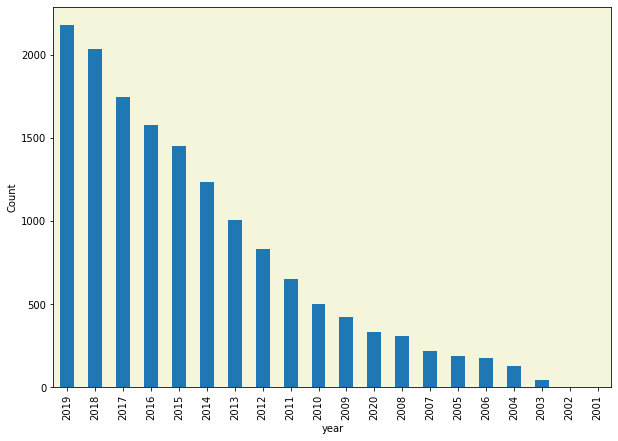

In [ ]:
plt.figure(figsize=(10,7))
plt.axes().set_facecolor('#F5F5DC')
plt.xlabel("year")
plt.ylabel("Count")
df.year.value_counts().plot(kind='bar')

In [ ]:
df.month.value_counts()

1     1410
11    1384
2     1299
3     1274
10    1246
6     1232
9     1232
4     1221
12    1218
8     1191
5     1187
7     1142
Name: month, dtype: int64

plot of the number of covid 19 articles published every month

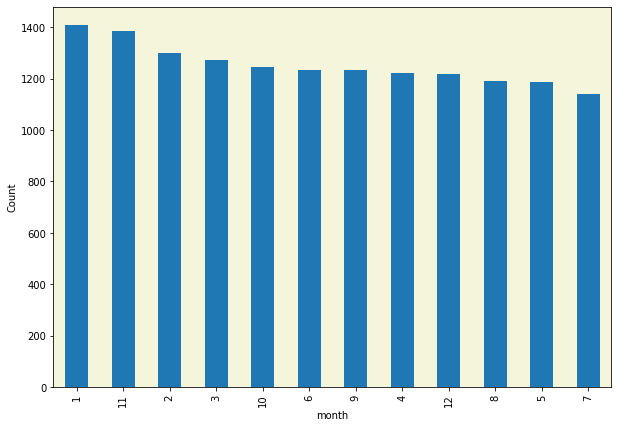

In [ ]:
plt.figure(figsize=(10,7))
plt.axes().set_facecolor('#F5F5DC')
plt.xlabel("month")
plt.ylabel("Count")
df.month.value_counts().plot(kind='bar')

plot of the licenses of articles published 



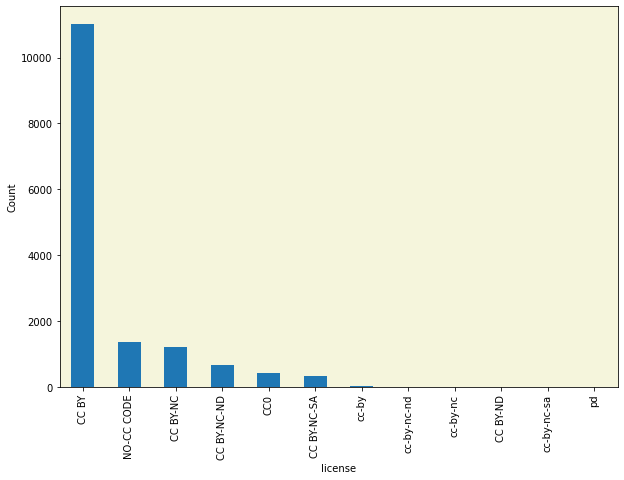

In [ ]:
plt.figure(figsize=(10,7))
plt.axes().set_facecolor('#F5F5DC')
plt.xlabel("license")
plt.ylabel("Count")
df.license.value_counts().plot(kind='bar')

In [ ]:
df.source_x.value_counts()

PMC    15010
CZI       26
Name: source_x, dtype: int64

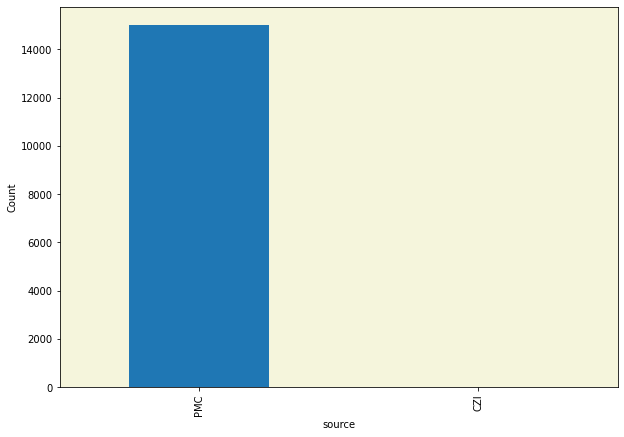

In [ ]:
plt.figure(figsize=(10,7))
plt.axes().set_facecolor('#F5F5DC')
plt.xlabel("source")
plt.ylabel("Count")
df.source_x.value_counts().plot(kind='bar')

In [ ]:
df.authors.value_counts()

['Ehrt, Christiane', 'Brinkjost, Tobias', 'Koch, Oliver']                                                                                                                                                                                                                                                                                                                                                                                                                               35
['Bhattacharya, Sabyasachi', 'Katlinski, Kanstantsin V', 'Reichert, Maximilian', 'Takano, Shigetsugu', 'Brice, Angela', 'Zhao, Bin', 'Yu, Qiujing', 'Zheng, Hui', 'Carbone, Christopher J', 'Katlinskaya, Yuliya V', 'Leu, N Adrian', 'McCorkell, Kelly A', 'Srinivasan, Satish', 'Girondo, Melanie', 'Rui, Hallgeir', 'May, Michael J', 'Avadhani, Narayan G', 'Rustgi, Anil K', 'Fuchs, Serge Y']                                                                                     31
['Bédubourg, Gabriel', 'Le Strat, Yann']          

converting text to lower case

In [ ]:
df['abstract']=df['abstract'].apply(lambda x: x.lower()) #converted to lower case
df['title']=df['title'].apply(lambda x: x.lower()) #converted to lower case

removing punctuations from text

In [ ]:
df['abstract']=df['abstract'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))  #removing punctuations
df['abstract']=df['abstract'].apply(lambda x: re.sub('\w*\d\w*','', x))
df['abstract']=df['abstract'].apply(lambda x: x.lower())

df['title']=df['title'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))  #removing punctuations
df['title']=df['title'].apply(lambda x: re.sub('\w*\d\w*','', x))
df['title']=df['title'].apply(lambda x: x.lower())

removing stopwords (the, is, and, a, etc.) from text

In [ ]:
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])
# Lemmatization with stopwords removal
df['title']=df['title'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))
df['abstract']=df['abstract'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [ ]:
df_title = df['title']
df_title = df_title.to_frame()

analysing the length of article headers 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


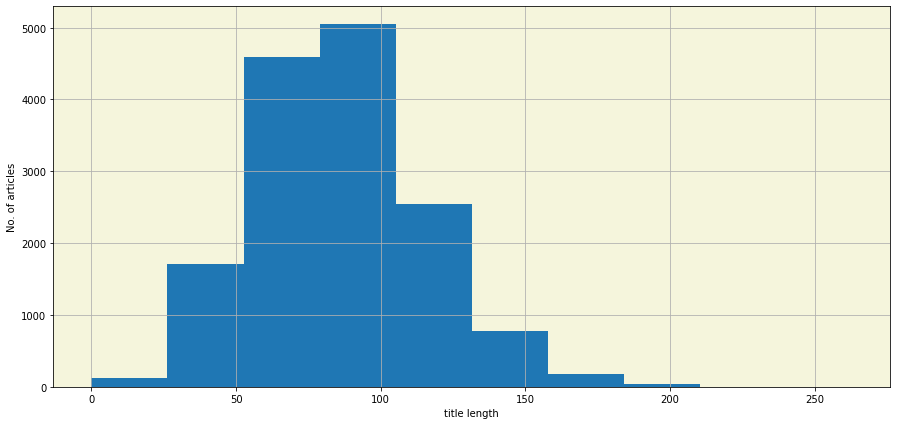

In [ ]:
plt.figure(figsize=(15,7))
plt.grid(None)
plt.axes().set_facecolor('#F5F5DC')
plt.xlabel("title length")
plt.ylabel("No. of articles")
df_title['title'].str.len().hist()

In [ ]:
for index,text in enumerate(df['abstract'][0:len(df)-1]):
  print('abstract %d:\n'%(index+1),text)

abstract 1:
 december   case unidentified pneumonia history exposure huanan seafood market report wuhan hubei province novel coronavirus   identify accountable disease humantohuman transmission confirm disease name   world health organization spread rapidly country world   february   number confirm case reach     fatality   result low casefatality rate   confirm case compare severe acute respiratory syndrome sars middle east respiratory syndrome mer symptom composition   fatality case collect release official report fever cough short breath chest tightnesspain major comorbiditie fatality case include hypertension diabete coronary heart disease cerebral infarction chronic bronchitis source virus pathogenesis disease unconfirmed specific therapeutic drug find chinese government initiate   public health response prevent spread disease crucial speed development vaccine drug treatment enable defeat   soon possible
abstract 2:
 summary genome detective webbase userfriendly software applicati

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




abstract 14857:
 cite paper qian et    al   attempt early detection influenza   pandemic surveillance datum influenza‐like illness unexplained pneumonia influenza respiratory virus   – background    collect disease information provide datum early detection epidemic surveillance system establish influenza‐like illness ili unexplained pneumonia wuxi people republic china objective    current study aim describe performance surveillance system – evaluate value surveillance datum detection influenza epidemics method    national ili sentinel hospital sentinel hospital provide datum surveillance system surveillance datum hospital‐base outpatient clinic emergency room compare year ili datum   model base previous datum control chart method move average regression method alarm potential epidemic raise input surveillance datum surpass threshold result      proportion ili respiratory illness fever surveillance syndrome system total patient visit · · respectively high previous year surveillance da

displaying the words that appear the maximum amount of times in the first 300 articles


In [ ]:
from collections import Counter
data_set =''
x = 1
while x<300:
    data_set = data_set + df['abstract'][x]
    x = x + 1
    
split_it = data_set.split()
Counter = Counter(split_it)
most_occur = Counter.most_common(20)
print(most_occur)

[('virus', 347), ('result', 278), ('patient', 235), ('disease', 232), ('infection', 225), ('gene', 213), ('study', 198), ('health', 197), ('viral', 190), ('model', 188), ('conclusion', 188), ('method', 184), ('cell', 181), ('outbreak', 176), ('human', 169), ('influenza', 167), ('sars', 160), ('respiratory', 158), ('protein', 153), ('analysis', 140)]


plot for the words that appear the maximum amount of times in the first 300 articles



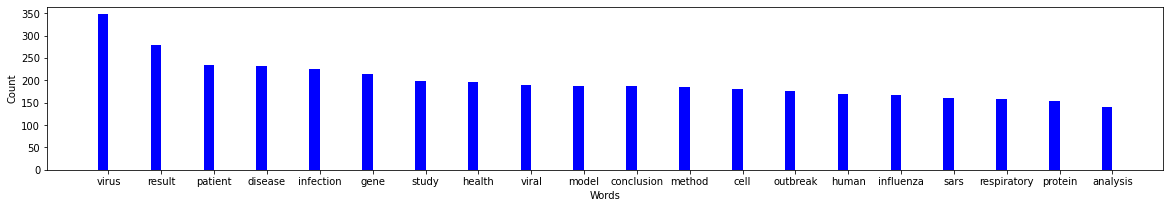

In [ ]:
data = most_occur
plt.rcParams["figure.figsize"] = (20,3)
names = [x[0] for x in data] 
values = [x[1] for x in data] 

ind = np.arange(len(data)) 
width = 0.2      

fig, ax = plt.subplots()
rects1 = ax.bar(ind, values, width, color='b')

ax.set_ylabel('Count')
ax.set_xlabel('Words')
ax.set_xticks(ind+width/2.)
ax.set_xticklabels(names)

plt.show()

sentiment analysis of the abstracts various articles

In [ ]:
from textblob import TextBlob
df['polarity']=df['abstract'].apply(lambda x:TextBlob(x).sentiment.polarity)

displaying the articles with the highest polarity




In [ ]:
print("Reviews with Highest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=False)[:5].index]['abstract']):
  print('Review {}:\n'.format(index+1),review)

Reviews with Highest Polarity:
Review 1:
 background leptospirosis morbidity mortality rate china decrease   analysis spatiotemporal demographic change occur decade implication estimate disease burden require inform intervention strategy study quantify epidemiological shift geographical heterogeneity burden leptospirosis – china method report leptospirosis case datum   january     december   routinely collect china information system disease control prevention cisdcp analyze epidemiological trend estimate burden term disabilityadjuste lifeyear daly space time demographical group result total   case report –    case laboratoryconfirme case   notify incidence rate gradually decrease p     relatively stable – p     – estimate total    daly lose leptospirosis comprise total    yearslive disability yld    yearslife lose ylls male high burden disease   daly compare female   dalys high burden estimate attribute young individual age –    year live southern province china – age group contribute

displaying the articles with the lowest polarity

In [ ]:
print("3 Random Reviews with lowest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=True)[:5].index]['abstract']):
  print('Review {}:\n'.format(index+1),review)

3 Random Reviews with lowest Polarity:
Review 1:
 limit information diversity virus cocirculate human animal report datum obtain large field collection enteric sample take human pig rodent mammal host vietnam       stool rectal swab sample subject virallyenriche agnostic metagenomic sequence short read sequence datum accessible european nucleotide archive ena link sequence datum metadata host type demography geographic location distinguish hospital patient member cohort identify high risk zoonotic infection eg abattoir workers rat trader animal datum suitable study virus diversity virus discovery human animal vietnam identify virus find multiple host potentially zoonotic
Review 2:
 vaccination regime classical masstype variant     live vaccine evaluate middle eastern   infectious bronchitis virus challenge group spf chick   birdsgroup vaccinate primeboost regime             respectively ciliostasis lesion score evaluate   vaccination bird challenge intranasally   post   vaccination   m

# **SPACY**

spaCy is an open-source software library for advanced natural language processing, written in the programming languages Python and Cython. 

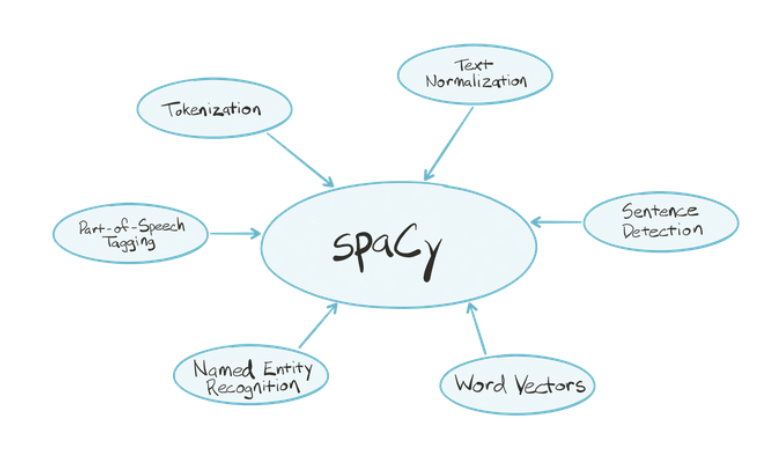

Spacy’s NER model is a simple classifier (e.g. a shallow feedforward neural network with a single hidden layer) that is made powerful using some clever feature engineering. Before the input features are fed into the classifier, a stack of weighted bloom embedding layers merge neighbouring features together. This gives each word a unique representation for each distinct context it is in.

The different tags available in Spacy

In [ ]:
print(f'PERSON - {spacy.explain("PERSON")}')
print(f'GPE    - {spacy.explain("GPE")}')
print(f'DATE   - {spacy.explain("DATE")}')
print(f'MONEY  - {spacy.explain("MONEY")}')
print(f'NORP  - {spacy.explain("NORP")}')
print(f'ORG  - {spacy.explain("ORG")}')
print(f'ORDINAL  - {spacy.explain("ORDINAL")}')
print(f'CARDINAL  - {spacy.explain("CARDINAL")}')
print(f'PRODUCT  - {spacy.explain("PRODUCT")}')

PERSON - People, including fictional
GPE    - Countries, cities, states
DATE   - Absolute or relative dates or periods
MONEY  - Monetary values, including unit
NORP  - Nationalities or religious or political groups
ORG  - Companies, agencies, institutions, etc.
ORDINAL  - "first", "second", etc.
CARDINAL  - Numerals that do not fall under another type
PRODUCT  - Objects, vehicles, foods, etc. (not services)


Simulation of prebuilt named entity recognition library (spacy) on a website consisting of covid articles

In [ ]:
def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html5lib')
    for script in soup(["script", "style", 'aside']):
        script.extract()
    return " ".join(re.split(r'[\n\t]+', soup.get_text()))
ny_bb = url_to_string('https://www.nature.com/articles/d41586-020-00502-w')
article = nlp(ny_bb)
len(article.ents)

4016

In [ ]:
article = nlp(df['abstract'][66])
len(article.ents)

5

In [ ]:
labels = [x.label_ for x in article.ents]
Counter(labels)

Counter({'ORG': 3, 'PERSON': 1, 'PRODUCT': 1})

In [ ]:
sentences = [x for x in article.sents]
print(sentences)

[genus coronavirus contain   specie coronaviruse covs important pathogen cause, highly prevalent disease severe fatal human animal licensed specific drug available prevent infection different host receptor cellular entry poorly conserve structural protein antigen high mutation recombination rate covs pose, significant problem development widespectrum anticov drug vaccine cov main protease mpros key enzyme viral gene expression replication reveal share highly conservative substraterecognition pocket comparison crystal structure homology model represent genetic cluster genus coronavirus conclusion support enzyme activity assay mechanismbase, irreversible inhibitor design base conserve structural region uniform inhibition mechanism elucidate structure mproinhibitor complex severe acute respiratory syndromecov porcine transmissible gastroenteritis virus structureassisted optimization program yield compound fast vitro inactivation multiple cov mpros potent antiviral activity extremely low c

In [ ]:
displacy.render(nlp(str(sentences)), jupyter=True, style='ent')

Simulation of prebuilt named entity recognition library (spacy) on our dataset 

In [ ]:
sentence = data_set

In [ ]:
data_set

'summary genome detective webbase userfriendly software application quickly accurately assemble know virus genome generation sequencing dataset application allow identification phylogenetic cluster genotype assemble genome fasta format release   produce number typing tool emergent virus cause large outbreak zika yellow fever virus brazil present genome detective coronavirus type tool accurately identify novel severe acute respiratory syndrome sars relate coronavirus   sequence isolate china world tool accept   sequence submission analysis new genome sequence approximately minute tool test validate hundred genome coronavirus specie correctly classify sarsrelated coronavirus sarsrcov available public datum   tool allow tracking new viral mutation outbreak expand globally help accelerate development novel diagnostic drug vaccine stop   disease availability httpswwwgenomedetectivecomapptypingtoolcov supplementary information supplementary datum available bioinformatic onlinedecember   nove

many of the entites related to coronavirus are either predicted incorrectly or are not even predicted, so we build a custom ner library using spacy

In [ ]:
doc = nlp(data_set)
displacy.render(doc, style='ent', jupyter=True)

creating a new dataset with title and abstract, so that it is easier to test the custom ner model

In [ ]:
df_ner = df[['title','abstract']]
df_ner

title                                           abstract
0      characteristic public health response coronavi...  december   case unidentified pneumonia history...
1      genome detective coronavirus type tool rapid i...  summary genome detective webbase userfriendly ...
2      optimization method forecasting confirm case  ...  december   novel coronavirus call   discover w...
3      passenger destination china low risk novel cor...  novel coronavirus    detect human week decembe...
4      new coronavirus associate human respiratory di...  emerge infectious disease sars zika present ma...
...                                                  ...                                                ...
15160  middle east respiratory syndrome coronavirus t...  middle east respiratory syndrome coronavirus m...
15161  middle east respiratory syndrome coronavirus t...  middle east respiratory syndrome coronavirus m...
15162   pseudoscience medicine cautionary recommendation  introduction certain real life application sci...
15163    sample contribute complete genome sequence a...  report complete genome sequence avian coronavi...
15164  complete genome sequence avian coronavirus str...  avian coronavirus know infectious bronchitis v...

[15036 rows x 2 columns]

In [ ]:
df_ner.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_ner

title                                           abstract
0      characteristic public health response coronavi...  december   case unidentified pneumonia history...
1      genome detective coronavirus type tool rapid i...  summary genome detective webbase userfriendly ...
2      optimization method forecasting confirm case  ...  december   novel coronavirus call   discover w...
3      passenger destination china low risk novel cor...  novel coronavirus    detect human week decembe...
4      new coronavirus associate human respiratory di...  emerge infectious disease sars zika present ma...
...                                                  ...                                                ...
15159  porcine deltacoronavirus infection transmissio...  coronaviruse cause respiratory gastrointestina...
15160  middle east respiratory syndrome coronavirus t...  middle east respiratory syndrome coronavirus m...
15162   pseudoscience medicine cautionary recommendation  introduction certain real life application sci...
15163    sample contribute complete genome sequence a...  report complete genome sequence avian coronavi...
15164  complete genome sequence avian coronavirus str...  avian coronavirus know infectious bronchitis v...

[11017 rows x 2 columns]

In [ ]:
df_ner['new_text'] = df_ner['title'].apply(lambda x: list(nlp(x).ents)) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_ner

title  ...                                           new_text
0      characteristic public health response coronavi...  ...                                          [(china)]
1      genome detective coronavirus type tool rapid i...  ...  [(genome, detective, coronavirus, type, tool, ...
2      optimization method forecasting confirm case  ...  ...                                          [(china)]
3      passenger destination china low risk novel cor...  ...                [(china), (africa, south, america)]
4      new coronavirus associate human respiratory di...  ...                                          [(china)]
...                                                  ...  ...                                                ...
15159  porcine deltacoronavirus infection transmissio...  ...  [(porcine, deltacoronavirus, infection, transm...
15160  middle east respiratory syndrome coronavirus t...  ...                                   [(middle, east)]
15162   pseudoscience medicine cautionary recommendation  ...                                                 []
15163    sample contribute complete genome sequence a...  ...  [(avian, coronavirus), (broiler, united, states)]
15164  complete genome sequence avian coronavirus str...  ...         [(complete, genome), (avian, coronavirus)]

[11017 rows x 3 columns]

building custom ner 

In [ ]:
test = spacy.load('en')

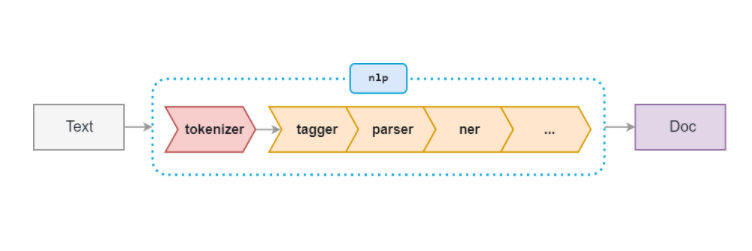

tokenizer - segments text into tokens <br>
tagger - assign part-of-speech tags <br>
parser - assign dependency labels <br>
ner - detect and label named entities <br>

spacy pipeline

In [ ]:
nlp.pipe_names

['tagger', 'parser', 'ner']

In [ ]:
ts = test(df_ner['abstract'][0])
for ent in ts.ents:
  print(f'{ent.label_.upper():{10}} - {ent.text}')

DATE       - december
GPE        - huanan
GPE        - wuhan hubei province
DATE       - february
LOC        - middle east
NORP       - chinese


In [ ]:
df_ner['abstract'][0]

'december   case unidentified pneumonia history exposure huanan seafood market report wuhan hubei province novel coronavirus   identify accountable disease humantohuman transmission confirm disease name   world health organization spread rapidly country world   february   number confirm case reach     fatality   result low casefatality rate   confirm case compare severe acute respiratory syndrome sars middle east respiratory syndrome mer symptom composition   fatality case collect release official report fever cough short breath chest tightnesspain major comorbiditie fatality case include hypertension diabete coronary heart disease cerebral infarction chronic bronchitis source virus pathogenesis disease unconfirmed specific therapeutic drug find chinese government initiate   public health response prevent spread disease crucial speed development vaccine drug treatment enable defeat   soon possible'

In [ ]:
nlp = spacy.blank('en')

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:126: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):


training data

In [ ]:
train_data = [
("novel coronavirus identify accountable disease human to human",{"entities":[(6,17,"VIRUS")]}),
("case unidentified pneumonia history exposure",{"entities":[(18,27,"ILLNESS")]}),
("fever cough short breath chest tightness pain major comorbiditie chronic bronchitis source virus pathogenesis disease ",{"entities":[(0,5,"ILLNESS"),(6,11,'ILLNESS')]}),
("vaccine drug treatment enable defeat soon possible",{"entities":[(0,7,"CURE"),(8,12,'CURE')]}),
("covid 19 has lead to the loss of jobs for many",{"entities":[(0,8,"VIRUS")]}),
("genome is present in most organisms",{"entities":[(0,6,"BIOLOGY")]}),
("covid 19 is also known as coronavirus it causes cough cold breathlessness and fever ",{"entities":[(0,8,"VIRUS"),(26,37,"VIRUS"),(48,52,"SYMPTOM"),(77,82,"SYMPTOM")]}),
("genome is present everywhere genome therapy is also available",{"entities":[(0,6,"BIOLOGY"),(29,35,"BIOLOGY")]}),
("yellow fever virus brazil present genome detective coronavirus",{"entities":[(0,12,"CURE"),(34,40,'GENE'),(51,62,"VIRUS")]}),
("coronavirus sequence isolate china world",{"entities":[(0,11,"VIRUS")]}),
("cough and cold are some of the most common symptoms",{"entities":[(0,5,"SYMPTOMS"),(10,14,"SYMPTOMS")]}),
("coronavirus has lead to deaths of millions",{"entities":[(0,11,"VIRUS")]}),
("covid 19 is prevelant all around the world",{"entities":[(0,8,"VIRUS")]}),
]

In [ ]:
def train_model(train_data):
    
  if 'ner' not in nlp.pipe_names:
    ner = nlp.create_pipe('ner')
    nlp.add_pipe(ner, last=True) 

  for _, annotation in train_data: 
    for ent in annotation['entities']: 
      ner.add_label(ent[2])  
    
    

  other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner'] 
  with nlp.disable_pipes(*other_pipes): 
        optimizer = nlp.begin_training()
        
        for itn in range(11):         
            print('Starting iteration ' + str(itn))
            random.shuffle(train_data)
            losses = {}
            for text, annotations in train_data:
              try:
                nlp.update(
                    [text],       
                    [annotations], 
                    drop=0.2,     
                    sgd=optimizer, 
                    losses=losses) 
              except Exception as e:
                pass

In [ ]:
train_model(train_data)

Starting iteration 0


/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use sele

Starting iteration 1


/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use sele

Starting iteration 2


/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use sele

Starting iteration 3


/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use sele

Starting iteration 4


/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use sele

Starting iteration 5


/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use sele

Starting iteration 6


/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use sele

Starting iteration 7


/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use sele

Starting iteration 8


/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use sele

Starting iteration 9


/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use sele

Starting iteration 10


/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use sele

In [ ]:
nlp.to_disk('nlp_model')

In [ ]:
nlp_model = spacy.load('nlp_model')

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:126: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):


In [ ]:
nlp_model.entity.labels

('BIOLOGY', 'CURE', 'GENE', 'ILLNESS', 'SYMPTOM', 'SYMPTOMS', 'VIRUS')

In [ ]:
doc = nlp_model(df_ner['abstract'][0])
for ent in doc.ents:
  print(f'{ent.label_.upper():{20}} - {ent.text}')

CURE                 - december
ILLNESS              - pneumonia
VIRUS                - coronavirus
ILLNESS              - cough
CURE                 - drug


/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):


custom spacy model 

In [ ]:
displacy.render(doc, style='ent', jupyter=True)

/usr/local/lib/python3.7/dist-packages/catalogue.py:126: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):


In [ ]:
doc = nlp_model(df_ner['abstract'][4])
for ent in doc.ents:
  print(f'{ent.label_.upper():{20}} - {ent.text}')

ILLNESS              - cough
VIRUS                - coronavirus
BIOLOGY              - genome


In [ ]:
displacy.render(doc, style='ent', jupyter=True)

# **TOPIC MODELLING**


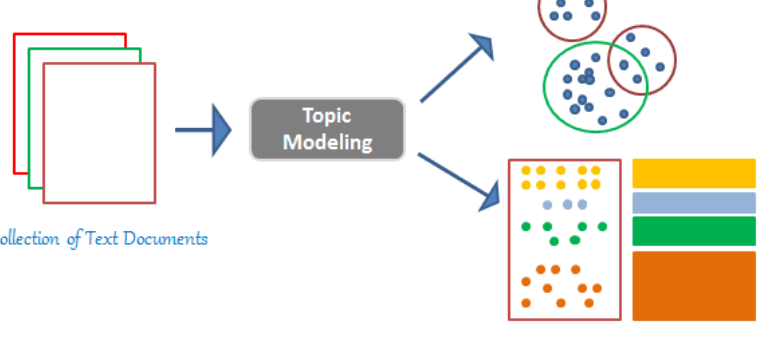

Topic modeling is a type of statistical modeling for discovering the abstract “topics” that occur in a collection of documents.

In [ ]:
vectorizer = CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
data_vectorized = vectorizer.fit_transform(df_ner["abstract"])

In [ ]:
NUM_TOPICS = 10

In [ ]:
lda = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online',verbose=True)
data_lda = lda.fit_transform(data_vectorized)

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


In [ ]:
nmf = NMF(n_components=NUM_TOPICS)
data_nmf = nmf.fit_transform(data_vectorized) 

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


In [ ]:
lsi = TruncatedSVD(n_components=NUM_TOPICS)
data_lsi = lsi.fit_transform(data_vectorized)

In [ ]:
def selected_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]]) 

**LDA - Latent dirichlet allocation** <br>
popular topic modeling technique to extract topics from a given corpus. <br>
Dirichlet model describes the pattern of the words that are repeating together, occurring frequently, and these words are similar to each other.

This stochastic process uses Bayesian inferences

In [ ]:
print("LDA Model:")
selected_topics(lda, vectorizer)

LDA Model:
Topic 0:
[('bacterial', 738.8246037484239), ('study', 715.6457050419127), ('cat', 652.9904798949431), ('cancer', 652.4532608094069), ('effect', 627.2248923838772), ('bacteria', 540.1290344709209), ('treatment', 513.4483623856875), ('concentration', 474.4692348311733), ('calf', 451.90070108771283), ('associate', 451.4764402965937)]
Topic 1:
[('protein', 2616.4952893575996), ('rna', 1855.1839805496566), ('structure', 1334.0177585551758), ('host', 1021.8499879646215), ('interaction', 981.9754400874976), ('target', 854.3037311189847), ('sequence', 815.5535439284715), ('function', 781.2106733073424), ('review', 748.0883026962804), ('complex', 742.1023601332857)]
Topic 2:
[('influenza', 3392.9136013840416), ('disease', 2350.4487131326673), ('outbreak', 2162.816944959341), ('case', 2123.6817347532838), ('transmission', 2006.610339015567), ('merscov', 1955.874109021965), ('infection', 1681.9233775585249), ('epidemic', 1367.7290103903745), ('pandemic', 1145.4647295749517), ('model', 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[('cell', 6576.175070860281), ('virus', 5778.078119741012), ('infection', 4074.464195119503), ('protein', 3848.2072742778637), ('viral', 3504.86010029646), ('replication', 2070.7566906919214), ('antiviral', 1885.5078966142485), ('host', 1782.1315763450016), ('expression', 1760.8938343350956), ('gene', 1358.8171501258428)]
Topic 4:
[('health', 4176.192421855285), ('disease', 1803.8649753048073), ('public', 1643.553431582943), ('research', 1038.9007018743416), ('study', 808.6559115219018), ('infectious', 767.5819014144547), ('need', 764.4544032310789), ('care', 761.1168233577673), ('response', 755.8378432170464), ('surveillance', 730.9923888183085)]
Topic 5:
[('datum', 1473.238908548917), ('method', 1413.9011934674227), ('study', 1043.0552304481625), ('analysis', 1024.0489291359515), ('result', 929.2010392579413), ('model', 757.1059264585396), ('mer', 688.324660531267), ('approach', 573.3008620496882), ('number', 558.0596091028415), ('base', 533.8266490347695)]
Topic 6:
[('virus', 6696.8

**NMF - Non negative matrix factorization** <br>
It belongs to the family of linear algebra algorithms that are used to identify the latent or hidden structure present in the data.

In [ ]:
print("NMF Model:")
selected_topics(nmf, vectorizer)

NMF Model:
Topic 0:
[('infection', 18.127859893499433), ('viral', 4.976124783556657), ('response', 2.3835392945172043), ('host', 1.4255681834739329), ('immune', 1.3230806879311658), ('ifn', 1.2658496215821398), ('cause', 1.24033884382214), ('mouse', 1.1367658826234648), ('antiviral', 1.128024967192792), ('disease', 1.083906558451041)]
Topic 1:
[('patient', 11.539074463095124), ('care', 5.293241349810091), ('intensive', 3.3087078165343318), ('outcome', 2.7697669110760224), ('unit', 2.729896891941871), ('icu', 2.7073607222117935), ('study', 2.539896559898109), ('acute', 2.0591027582477626), ('ill', 1.8452705642417306), ('critically', 1.7642654499440933)]
Topic 2:
[('cell', 14.707265251435533), ('expression', 1.9042500134266385), ('human', 1.3901076575804439), ('effect', 1.044939864617009), ('result', 1.0015361844769408), ('induce', 0.9841526894444231), ('mouse', 0.9713124117609542), ('line', 0.9236510442892224), ('increase', 0.9086800409879501), ('response', 0.8950901257286623)]
Topic 3:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[('disease', 6.665529552522255), ('health', 6.600926989236779), ('public', 2.639672501902442), ('outbreak', 2.2419746687371793), ('study', 2.067407482160772), ('infectious', 2.0173403921016693), ('datum', 1.9606938388153268), ('model', 1.8468769161532814), ('case', 1.7306663897202994), ('risk', 1.5385521051647872)]
Topic 4:
[('protein', 12.44877308948498), ('viral', 1.977381599294288), ('rna', 1.558997542383811), ('host', 1.3803582580655633), ('interaction', 1.3129894835523475), ('activity', 1.1768120939593907), ('membrane', 1.1369352827039472), ('cellular', 1.1248345926552163), ('identify', 1.102190373572603), ('domain', 1.0662511752015087)]
Topic 5:
[('virus', 20.37182060073115), ('viral', 3.7533622092467924), ('human', 2.7082205186879973), ('rna', 1.5753159016329823), ('host', 1.2201822801693984), ('bat', 1.0308831946516328), ('replication', 0.9990874539870365), ('detect', 0.895640796394899), ('respiratory', 0.8901720025931662), ('genome', 0.7120870647817962)]
Topic 6:
[('respirator

# **SPARK NLP**

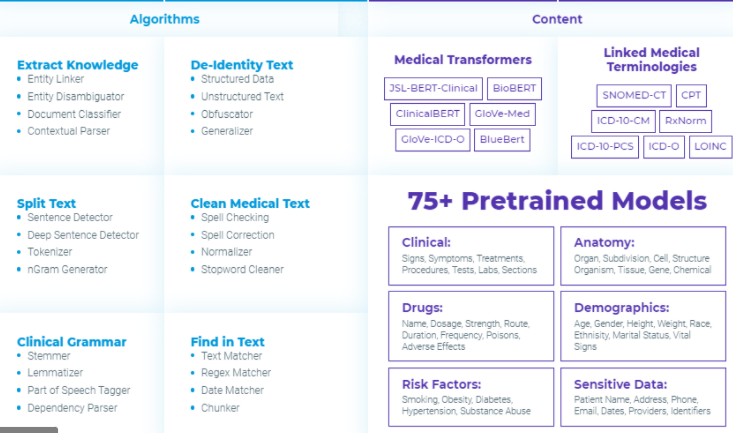

Spark NLP is a state-of-the-art Natural Language Processing library built on top of Apache Spark. It provides simple, performant & accurate NLP annotations for machine learning pipelines that scale easily in a distributed environment. 

spark is similar to scikit learn, i.e it provides different ml algorithms <br>
eg: it provides BERT, a very popular nlp model which uses Transformers

importing spark nlp library

In [ ]:
!wget http://setup.johnsnowlabs.com/colab.sh -O - | bash

--2021-11-18 16:30:04--  http://setup.johnsnowlabs.com/colab.sh
Resolving setup.johnsnowlabs.com (setup.johnsnowlabs.com)... 51.158.130.125
Connecting to setup.johnsnowlabs.com (setup.johnsnowlabs.com)|51.158.130.125|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://setup.johnsnowlabs.com/colab.sh [following]
--2021-11-18 16:30:04--  https://setup.johnsnowlabs.com/colab.sh
Connecting to setup.johnsnowlabs.com (setup.johnsnowlabs.com)|51.158.130.125|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/scripts/colab_setup.sh [following]
--2021-11-18 16:30:04--  https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:44

In [ ]:
import sparknlp
spark = sparknlp.start()

In [ ]:
from sparknlp.pretrained import PretrainedPipeline

pipeline = PretrainedPipeline('onto_recognize_entities_bert_tiny')

onto_recognize_entities_bert_tiny download started this may take some time.
Approx size to download 30.2 MB
[OK!]


In [ ]:
result = pipeline.annotate(df_ner['abstract'][0])

In [ ]:
print(result['ner'])

['B-DATE', 'O', 'O', 'O', 'O', 'O', 'B-GPE', 'O', 'O', 'O', 'B-LOC', 'I-LOC', 'I-LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-DATE', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-LOC', 'I-LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-NORP', 'O', 'O', 'O', 'O']


In [ ]:
ner = [result['ner'] for content in result]
token = [result['token'] for content in result]
# let's put token and tag together
list(zip(token[0], ner[0]))

[('december', 'B-DATE'),
 ('case', 'O'),
 ('unidentified', 'O'),
 ('pneumonia', 'O'),
 ('history', 'O'),
 ('exposure', 'O'),
 ('huanan', 'B-GPE'),
 ('seafood', 'O'),
 ('market', 'O'),
 ('report', 'O'),
 ('wuhan', 'B-LOC'),
 ('hubei', 'I-LOC'),
 ('province', 'I-LOC'),
 ('novel', 'O'),
 ('coronavirus', 'O'),
 ('identify', 'O'),
 ('accountable', 'O'),
 ('disease', 'O'),
 ('humantohuman', 'O'),
 ('transmission', 'O'),
 ('confirm', 'O'),
 ('disease', 'O'),
 ('name', 'O'),
 ('world', 'O'),
 ('health', 'O'),
 ('organization', 'O'),
 ('spread', 'O'),
 ('rapidly', 'O'),
 ('country', 'O'),
 ('world', 'O'),
 ('february', 'B-DATE'),
 ('number', 'O'),
 ('confirm', 'O'),
 ('case', 'O'),
 ('reach', 'O'),
 ('fatality', 'O'),
 ('result', 'O'),
 ('low', 'O'),
 ('casefatality', 'O'),
 ('rate', 'O'),
 ('confirm', 'O'),
 ('case', 'O'),
 ('compare', 'O'),
 ('severe', 'O'),
 ('acute', 'O'),
 ('respiratory', 'O'),
 ('syndrome', 'O'),
 ('sars', 'O'),
 ('middle', 'B-LOC'),
 ('east', 'I-LOC'),
 ('respiratory', '

In [ ]:
print(result['entities'])

['december', 'huanan', 'wuhan hubei province', 'february', 'middle east', 'chinese']


appending text files to the dataset

In [ ]:
path_to_json = '/content/drive/MyDrive/Machine learning/kgarrett-covid-19-open-research-dataset/biorxiv_medrxiv'

In [ ]:
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
json_files

['2cfe7a4cc1fceed0ad7ffbd6244a61e0b2c3ac8b.json',
 '21100aba41a4bfb48d7dc37f1bf5dbb38bf3867a.json',
 '0ff4ad5359ee2df3568605385a8616d8da66bf2c.json',
 '0015023cc06b5362d332b3baf348d11567ca2fbb.json',
 '1218f278a4f8d83dac14b23c8f698062812ef9d5.json',
 '28b107243576723248ad4053261000311a22f134.json',
 '10525ac89e46be4cb9cb9fd1131d28411a902047.json',
 '29bc34aad802ab6b35074f23c631540a84b16d0d.json',
 '3b22eecad8a582436c52284a4db2198a98a94e18.json',
 '029c1c588047f1d612a219ee15494d2d19ff7439.json',
 '06c1b3535b83251cf92c01258b5048beeab7a460.json',
 '0624a12abfe85c8b5070850d912a2db4cd453236.json',
 '1df9ce60e358f6cef0be3f6e15fe2a9c6f93f39c.json',
 '12fac9aedb1a09a3922a3c084ce4723708e463d6.json',
 '0cb9c296684ca5e71462d825cab2827854a01544.json',
 '11875dfda6cd04d5032611edf0e340582ceb620f.json',
 '313dd0869f169624e78d770963eacb0d1641cafa.json',
 '24e17488d399c436305c819953beae2961214771.json',
 '3319392ca8bd2b8f2e2d00bccdb80deaa8a77c2e.json',
 '15ad534bb2ec7bc4b0ee83ddac11a1b837d743c6.json',


# **NER AFTER APPENDING TEXT BODY**

In [ ]:
import json
import os
from tqdm import tqdm,tqdm_notebook
import gc

In [ ]:
jsons_data = pd.DataFrame(columns=['paper_id', 'abstract', 'body_text'])

id2abstract = []
# we need both the json and an index number so use enumerate()
for index, js in enumerate(json_files[:1000]):     # Using 1000 files only to reduce memory load and resources
    with open(os.path.join(path_to_json, js)) as json_file:
        json_text = json.load(json_file)

        # here you need to know the layout of your json and each json has to have
        # the same structure (obviously not the structure I have here)
        paper_id = json_text['paper_id']
        # abstract = json_text['abstract'][0]['text']
        abstract=''
        for entry in json_text['abstract']:
                abstract += entry['text']
        id2abstract.append({paper_id:abstract})
                #abstract.append(entry['text'])
        body_text=""
        for entry in json_text['body_text']:
                body_text += entry['text']
                #body_text.append(entry['text'])
                
        # here I push a list of data into a pandas DataFrame at row given by 'index'
        jsons_data.loc[index] = [paper_id, abstract, body_text]

# now that we have the pertinent json data in our DataFrame let's look at it
print(jsons_data)

                                     paper_id  ...                                          body_text
0    2cfe7a4cc1fceed0ad7ffbd6244a61e0b2c3ac8b  ...  A novel coronavirus disease (COVID-19) outbrea...
1    21100aba41a4bfb48d7dc37f1bf5dbb38bf3867a  ...  Coronaviruses (CoVs) typically affect the resp...
2    0ff4ad5359ee2df3568605385a8616d8da66bf2c  ...  Since December 2019, a novel coronavirus (SARS...
3    0015023cc06b5362d332b3baf348d11567ca2fbb  ...  VP3, and VP0 (which is further processed to VP...
4    1218f278a4f8d83dac14b23c8f698062812ef9d5  ...  (2.2 with 90% high density interval 1.4-3.8 (R...
..                                        ...  ...                                                ...
183  3c476baf5542bef88b8aad92bcca6786d1afa282  ...  • Understanding DENV transmission in populatio...
184  380a4d07d22910246c6f189fd2da93b270b96981  ...  The key to the extraordinary versatility of pr...
185  3a73b880acd8983f87b210ff7fee434fd6ecc8c8  ...  Since emerging in Wuhan, China

In [ ]:
df_js = jsons_data

In [ ]:
df_js

paper_id  ...                                          body_text
0    2cfe7a4cc1fceed0ad7ffbd6244a61e0b2c3ac8b  ...  A novel coronavirus disease (COVID-19) outbrea...
1    21100aba41a4bfb48d7dc37f1bf5dbb38bf3867a  ...  Coronaviruses (CoVs) typically affect the resp...
2    0ff4ad5359ee2df3568605385a8616d8da66bf2c  ...  Since December 2019, a novel coronavirus (SARS...
3    0015023cc06b5362d332b3baf348d11567ca2fbb  ...  VP3, and VP0 (which is further processed to VP...
4    1218f278a4f8d83dac14b23c8f698062812ef9d5  ...  (2.2 with 90% high density interval 1.4-3.8 (R...
..                                        ...  ...                                                ...
183  3c476baf5542bef88b8aad92bcca6786d1afa282  ...  • Understanding DENV transmission in populatio...
184  380a4d07d22910246c6f189fd2da93b270b96981  ...  The key to the extraordinary versatility of pr...
185  3a73b880acd8983f87b210ff7fee434fd6ecc8c8  ...  Since emerging in Wuhan, China in December of ...
186  3028628066ec2401f3981f4e70c5b1acd4cef573  ...  quarantined and sections of the Baodi District...
187  36e602b7081e7bb8a1cfeaa2fb92b0c43abd4fef  ...  Coronaviruses (subfamily Coronavirinae, family...

[188 rows x 3 columns]

In [ ]:
df_js.drop(df_js.index[0],inplace=True)

In [ ]:
df_js

paper_id  ...                                          body_text
1    21100aba41a4bfb48d7dc37f1bf5dbb38bf3867a  ...  Coronaviruses (CoVs) typically affect the resp...
2    0ff4ad5359ee2df3568605385a8616d8da66bf2c  ...  Since December 2019, a novel coronavirus (SARS...
3    0015023cc06b5362d332b3baf348d11567ca2fbb  ...  VP3, and VP0 (which is further processed to VP...
4    1218f278a4f8d83dac14b23c8f698062812ef9d5  ...  (2.2 with 90% high density interval 1.4-3.8 (R...
5    28b107243576723248ad4053261000311a22f134  ...  i c , a n t i f u n g a l o r a n t i v i r a ...
..                                        ...  ...                                                ...
183  3c476baf5542bef88b8aad92bcca6786d1afa282  ...  • Understanding DENV transmission in populatio...
184  380a4d07d22910246c6f189fd2da93b270b96981  ...  The key to the extraordinary versatility of pr...
185  3a73b880acd8983f87b210ff7fee434fd6ecc8c8  ...  Since emerging in Wuhan, China in December of ...
186  3028628066ec2401f3981f4e70c5b1acd4cef573  ...  quarantined and sections of the Baodi District...
187  36e602b7081e7bb8a1cfeaa2fb92b0c43abd4fef  ...  Coronaviruses (subfamily Coronavirinae, family...

[187 rows x 3 columns]

In [ ]:
df_js.describe()

paper_id  ...                                          body_text
count                                        187  ...                                                187
unique                                       187  ...                                                187
top     36521caf90f471c9da1a4e84f8562440d73ead9a  ...  Inferring the temporal trends or dynamics of a...
freq                                           1  ...                                                  1

[4 rows x 3 columns]

In [ ]:
df_js['abstract_word_count'] = df_js['abstract'].apply(lambda x: len(x.strip().split()))
df_js['body_word_count'] = df_js['body_text'].apply(lambda x: len(x.strip().split())) 
df_js['body_unique_words']=df_js['body_text'].apply(lambda x:len(set(str(x).split())))

In [ ]:
df_js.drop(df_js.index[df_js['abstract_word_count'] == 0], inplace = True)
df_js.drop(df_js.index[df_js['body_word_count'] == 0], inplace = True)

In [ ]:
df_js["abstract"] = df_js["abstract"].str.lower() 
df_js["body_text"] = df_js["body_text"].str.lower() 

In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer_pattern = RegexpTokenizer('\w+')
df_js['abstract'] = df_js['abstract'].apply(lambda x: " ".join(tokenizer_pattern.tokenize(x.lower())))
df_js['body_text'] = df_js['body_text'].apply(lambda x: " ".join(tokenizer_pattern.tokenize(x.lower())))
df_js

<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: DeprecationWarning: invalid escape sequence \w
<ipython-input-253-f63354e467ce>:2: DeprecationWarning: invalid escape sequence \w
  tokenizer_pattern = RegexpTokenizer('\w+')


paper_id  ... body_unique_words
1    21100aba41a4bfb48d7dc37f1bf5dbb38bf3867a  ...              1687
2    0ff4ad5359ee2df3568605385a8616d8da66bf2c  ...              1203
3    0015023cc06b5362d332b3baf348d11567ca2fbb  ...               704
4    1218f278a4f8d83dac14b23c8f698062812ef9d5  ...              1184
6    10525ac89e46be4cb9cb9fd1131d28411a902047  ...              2202
..                                        ...  ...               ...
183  3c476baf5542bef88b8aad92bcca6786d1afa282  ...               754
184  380a4d07d22910246c6f189fd2da93b270b96981  ...              2407
185  3a73b880acd8983f87b210ff7fee434fd6ecc8c8  ...              1349
186  3028628066ec2401f3981f4e70c5b1acd4cef573  ...              1180
187  36e602b7081e7bb8a1cfeaa2fb92b0c43abd4fef  ...              1918

[171 rows x 6 columns]

In [ ]:
df_js = df_js.reset_index(drop=True)
df_js

paper_id  ... body_unique_words
0    21100aba41a4bfb48d7dc37f1bf5dbb38bf3867a  ...              1687
1    0ff4ad5359ee2df3568605385a8616d8da66bf2c  ...              1203
2    0015023cc06b5362d332b3baf348d11567ca2fbb  ...               704
3    1218f278a4f8d83dac14b23c8f698062812ef9d5  ...              1184
4    10525ac89e46be4cb9cb9fd1131d28411a902047  ...              2202
..                                        ...  ...               ...
166  3c476baf5542bef88b8aad92bcca6786d1afa282  ...               754
167  380a4d07d22910246c6f189fd2da93b270b96981  ...              2407
168  3a73b880acd8983f87b210ff7fee434fd6ecc8c8  ...              1349
169  3028628066ec2401f3981f4e70c5b1acd4cef573  ...              1180
170  36e602b7081e7bb8a1cfeaa2fb92b0c43abd4fef  ...              1918

[171 rows x 6 columns]

In [ ]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off");

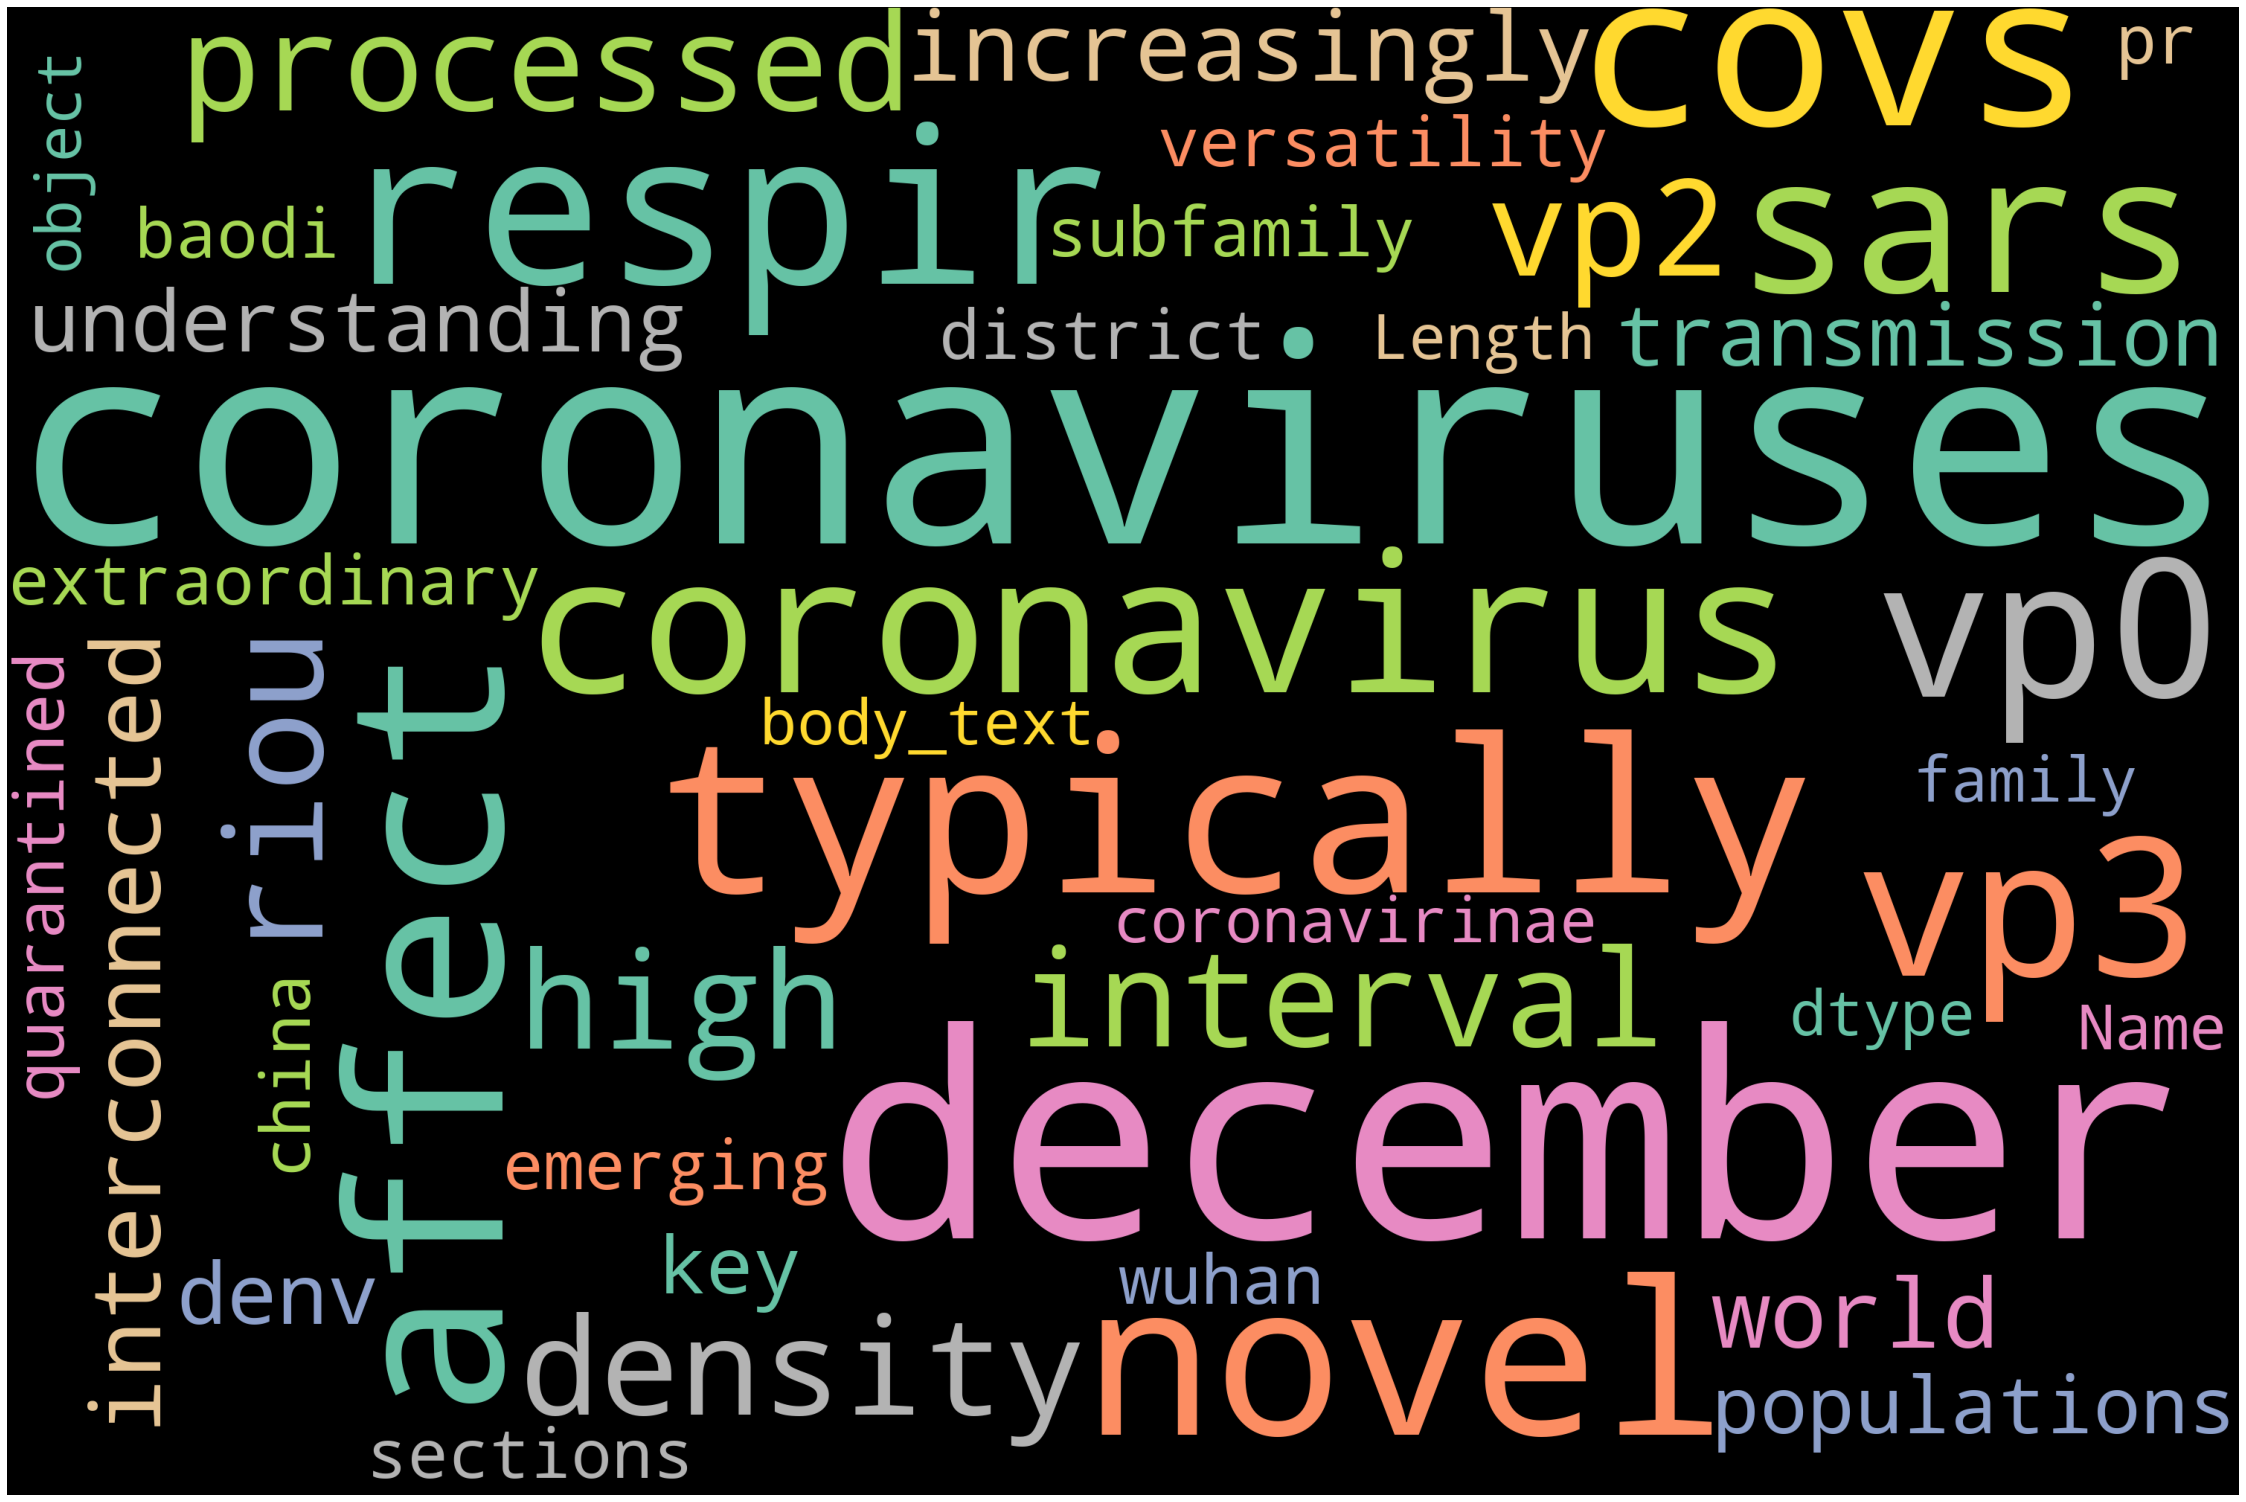

In [ ]:
text = str(df_js.body_text)

# Import package
from wordcloud import WordCloud
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False).generate(text)
# Plot
plot_cloud(wordcloud)

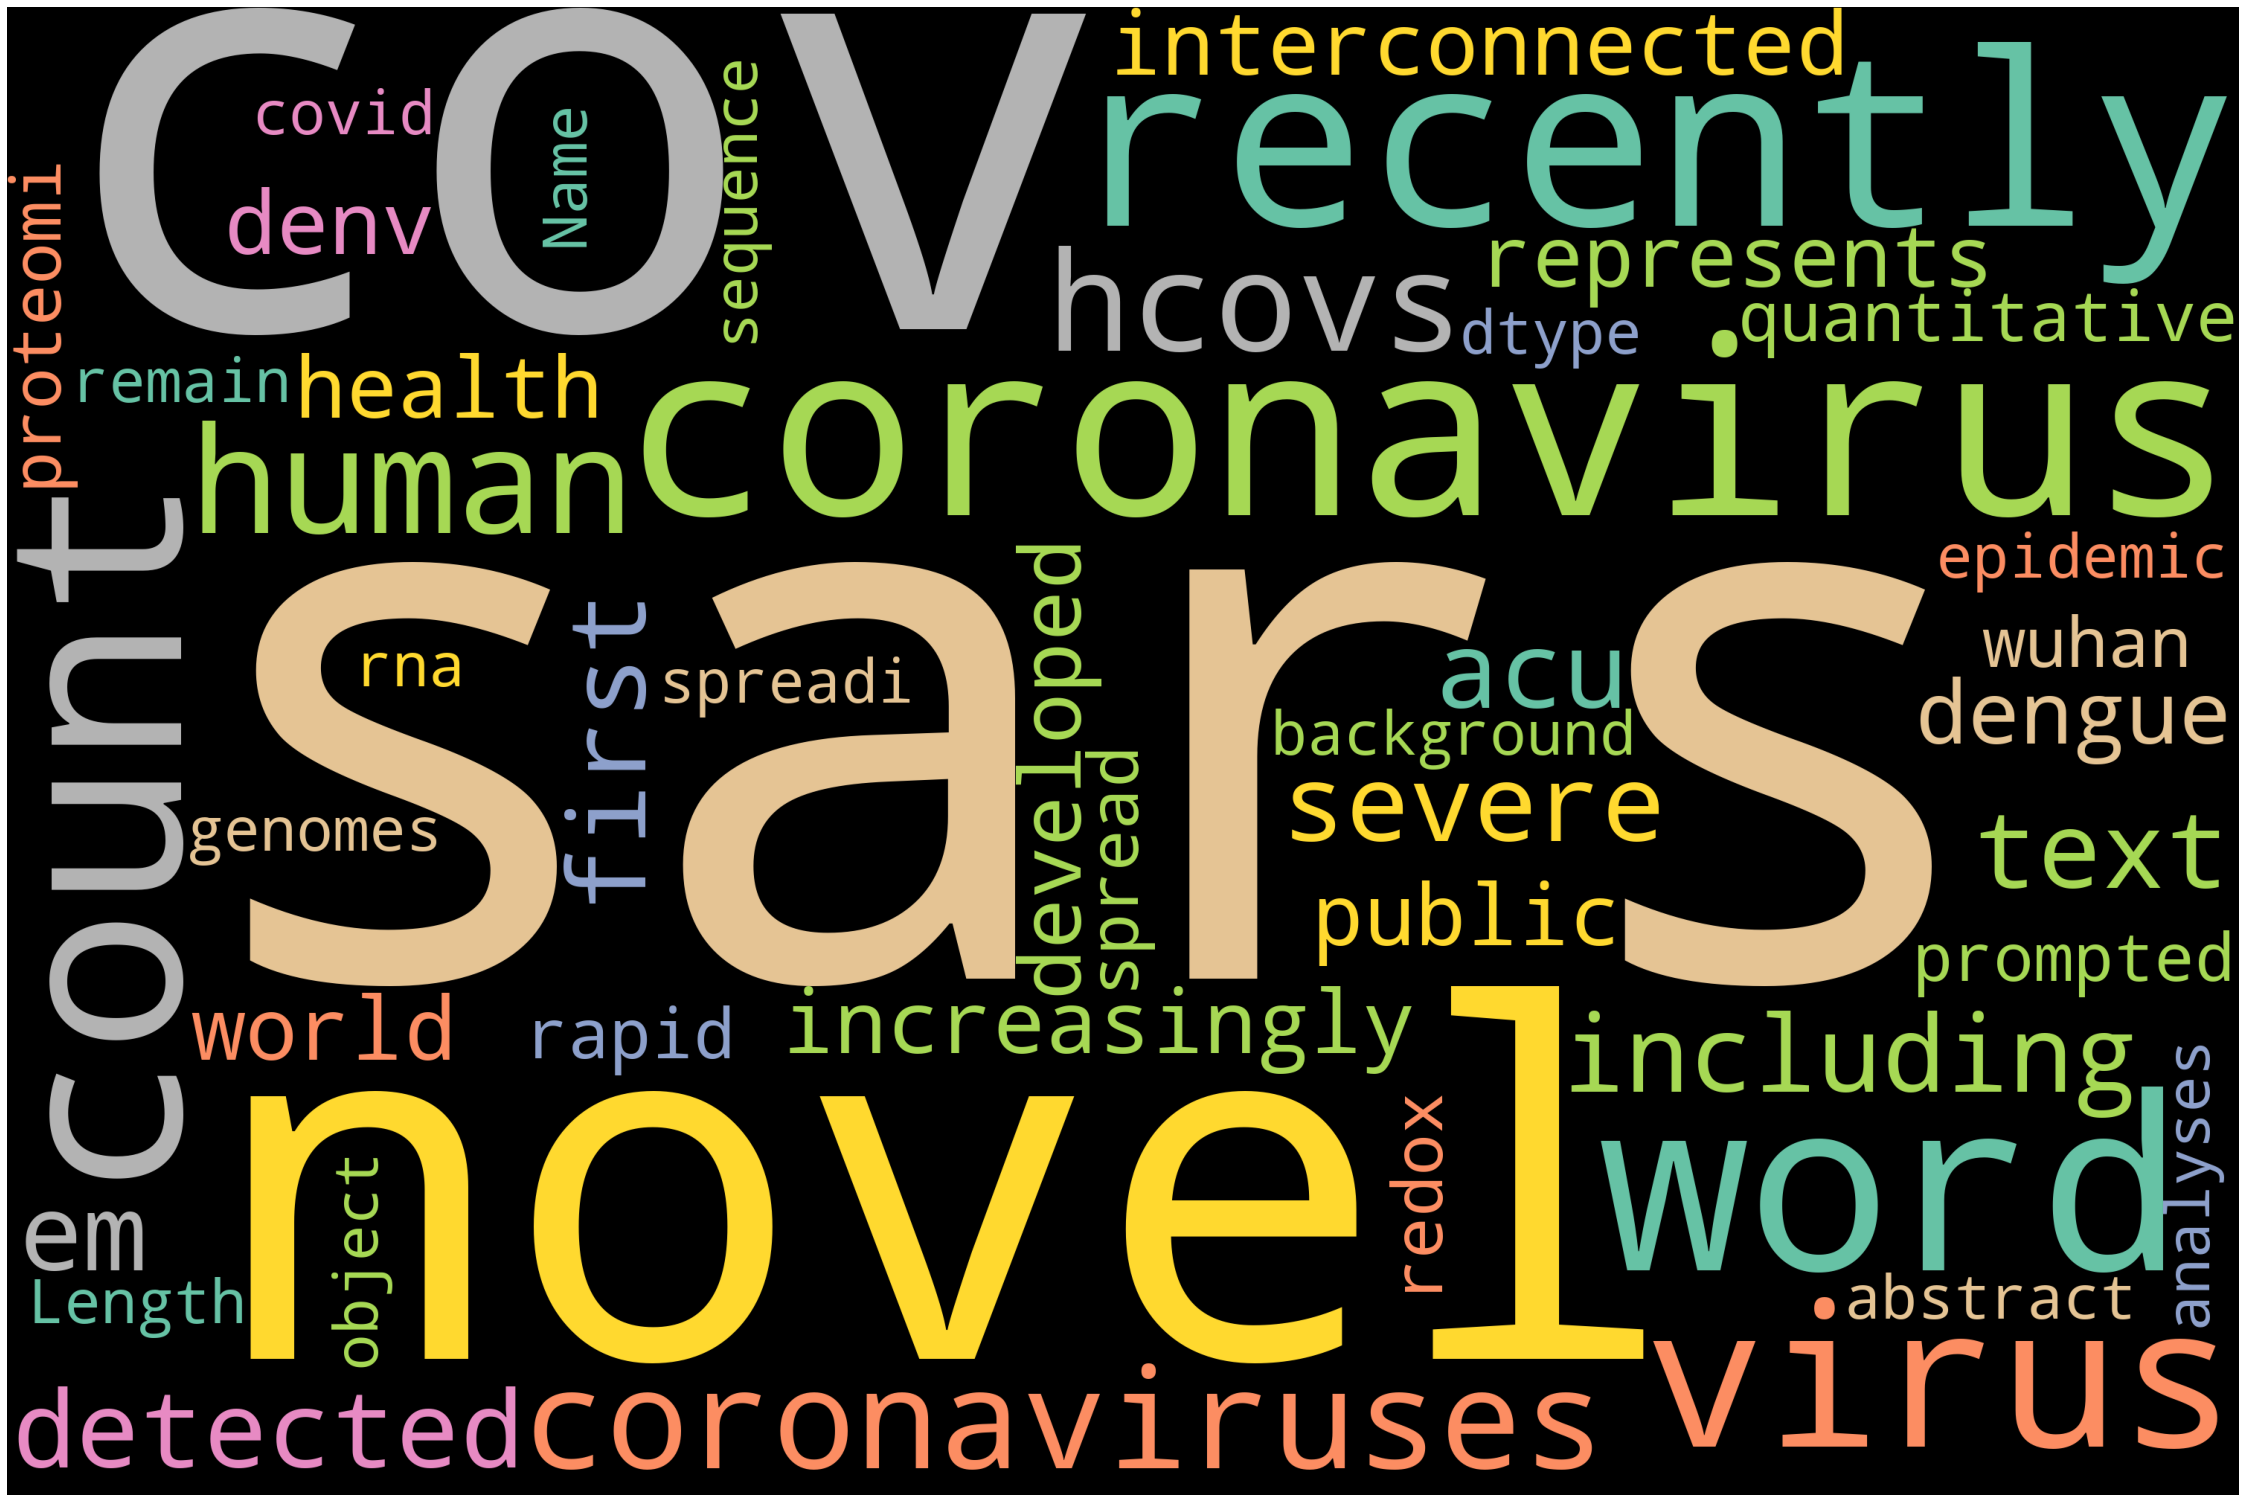

In [ ]:
text = str(df_js.abstract)

# Import package
from wordcloud import WordCloud
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False).generate(text)
# Plot
plot_cloud(wordcloud)

In [ ]:
doc = nlp_model(df_js['body_text'][4])
for ent in doc.ents:
  print(f'{ent.label_.upper():{20}} - {ent.text}')

displacy.render(doc, style='ent', jupyter=True)

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):


VIRUS                - in
VIRUS                - corresponding
VIRUS                - 12
BIOLOGY              - generating
BIOLOGY              - 13
BIOLOGY              - growing
BIOLOGY              - 14
VIRUS                - 15
VIRUS                - 16
VIRUS                - combine
VIRUS                - 17
VIRUS                - 44
SYMPTOMS             - 0
VIRUS                - 1b
VIRUS                - 0
BIOLOGY              - gravity
VIRUS                - 21
VIRUS                - ω
SYMPTOMS             - 57
VIRUS                - 5
VIRUS                - 0
VIRUS                - 32
VIRUS                - 12
CURE                 - fig
GENE                 - 17
VIRUS                - 0 95
VIRUS                - 0
BIOLOGY              - 80
GENE                 - 95
VIRUS                - precision
VIRUS                - 58
VIRUS                - 49
VIRUS                - 4
VIRUS                - 42
VIRUS                - 45
VIRUS                - growing
VIRUS                -

/usr/local/lib/python3.7/dist-packages/catalogue.py:126: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
